In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [52]:
catfish_sales = pd.read_csv('catfish_sales.csv', parse_dates=[0], index_col=0)

In [55]:
catfish_sales.head()

Total
Date             
1986-01-01   9034
1986-01-02   9596
1986-01-03  10558
1986-01-04   9002
1986-01-05   9239

Text(0, 0.5, 'Sales')

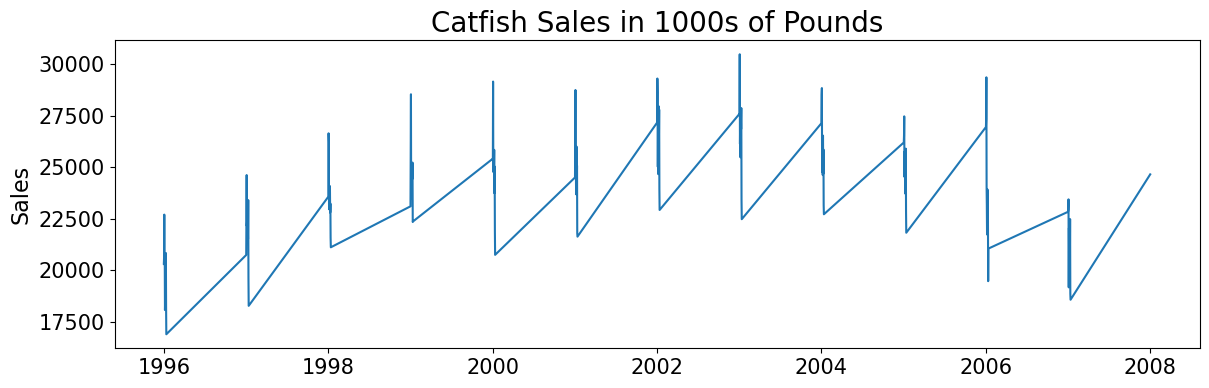

In [53]:
#catfish_sales = catfish_sales.asfreq(pd.infer_freq(catfish_sales.index))

start_date = datetime(1996,1,1)
end_date = datetime(2008,1,1)
lim_catfish_sales = catfish_sales[start_date:end_date]

plt.figure(figsize=(14,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time
import seaborn as sns

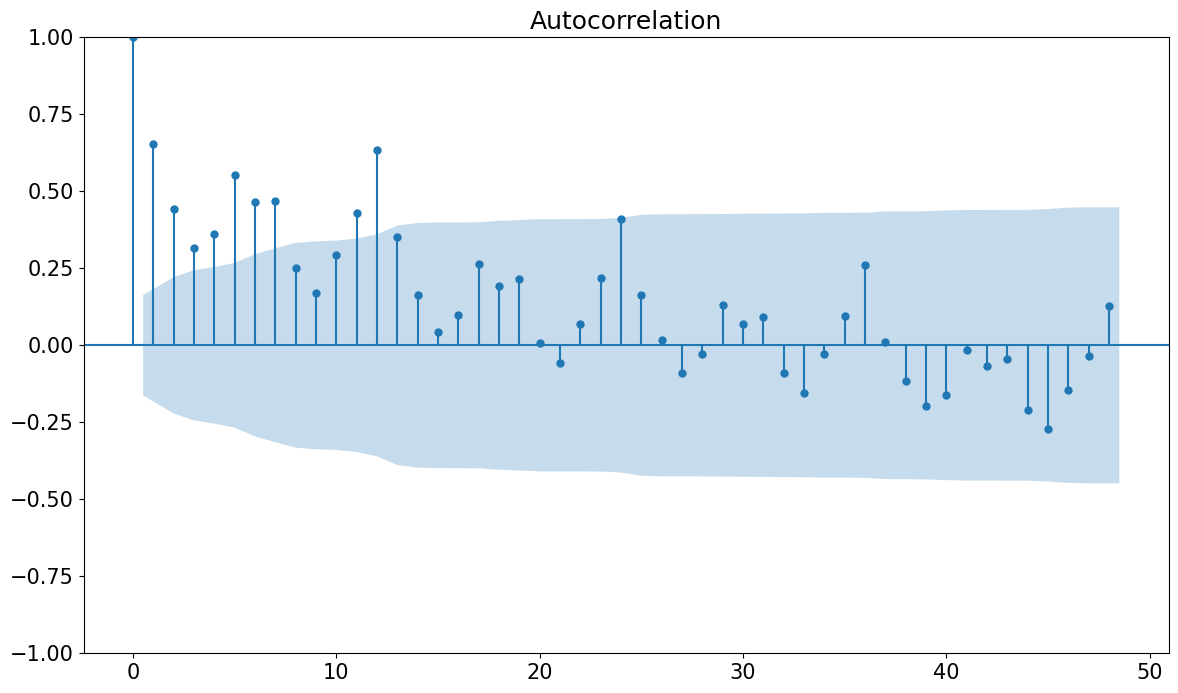

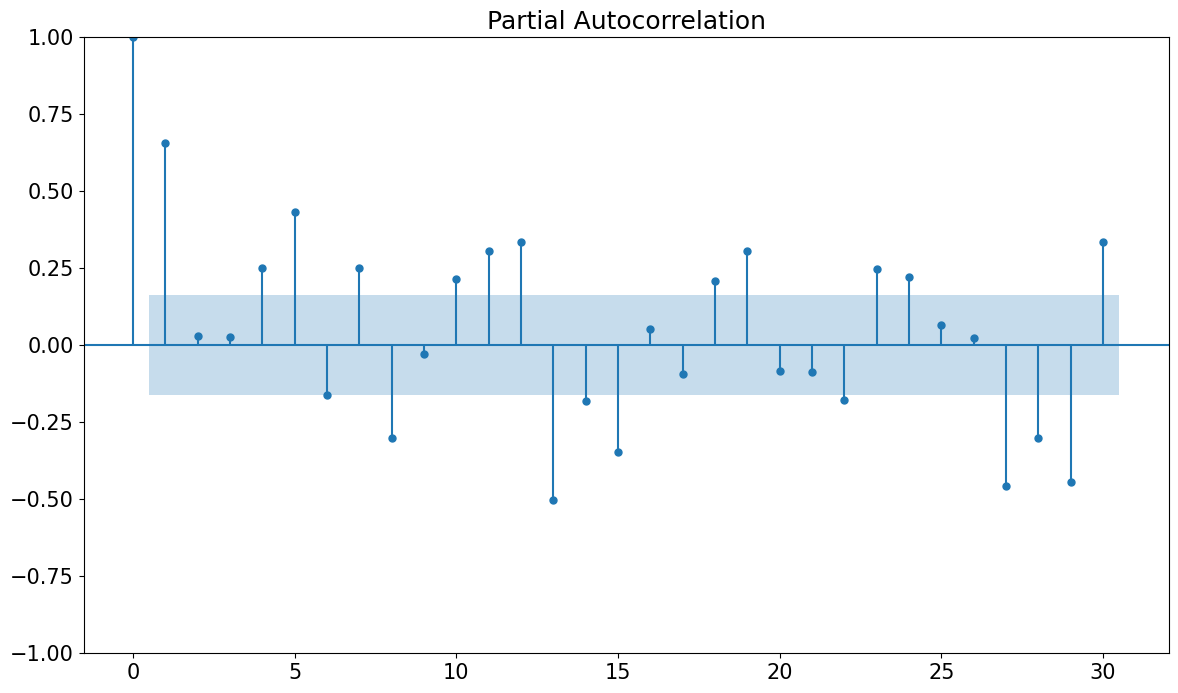

In [56]:
plot_acf(lim_catfish_sales['Total'], lags=48);
plot_pacf(lim_catfish_sales['Total'], lags=30);

In [45]:
def ad_test(dataset):
    
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1: ADF: ", dftest[0])
    print("2: P-value: ", dftest[1])
    print("3: Num of Lags ", dftest[2])
    print("4: Num of Observations Used for Regression and Critical Value ", dftest[3])
    print("5: Critical Values :")
    for key, val in dftest[4].items():
        print("\t", key, ":", val)
        
ad_test(lim_catfish_sales['Total'])

1: ADF:  -1.879699867133865
2: P-value:  0.3416703607148016
3: Num of Lags  14
4: Num of Observations Used for Regression and Critical Value  130
5: Critical Values :
	 1% : -3.4816817173418295
	 5% : -2.8840418343195267
	 10% : -2.578770059171598


In [57]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

stepwise_fit =  auto_arima(lim_catfish_sales['Total'], trace= True, suppress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2621.764, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2637.898, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2636.005, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2634.729, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2635.926, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2619.039, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2620.895, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2618.413, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2617.604, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2636.977, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2607.911, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2622.543, Time=0.05 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2599.293, Time=0.28 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2602.408, Time=0.08 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  145
Model:               SARIMAX(4, 1, 1)   Log Likelihood               -1292.692
Date:                Fri, 05 May 2023   AIC                           2597.385
Time:                        20:35:46   BIC                           2615.204
Sample:                             0   HQIC                          2604.625
                                - 145                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7808      0.115     -6.768      0.000      -1.007      -0.555
ar.L2         -0.3206      0.071     -4.497      0.000      -0.460      -0.181
ar.L3         -0.4493      0.069     -6.544      0.000      -0.584      -0.315
ar.L4         -0.4493      0.047     -9.556      0.000      -0.541      -0.357
ma.L1          0.5468      0.129      4.254      0.000       0.295       0.799
sigma2      3.266e+06   3.92e+05      8.330      0.000     2.5e+06    4.03e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.50   Jarque-Bera (JB):                 6.65
Prob(Q):                              0.48   Prob(JB):                         0.04
Heteroskedasticity (H):               0.67   Skew:                             0.52
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
arima = ARIMA(lim_catfish_sales['Total'], order=(4,1,1))
predictions = arima.fit().predict()

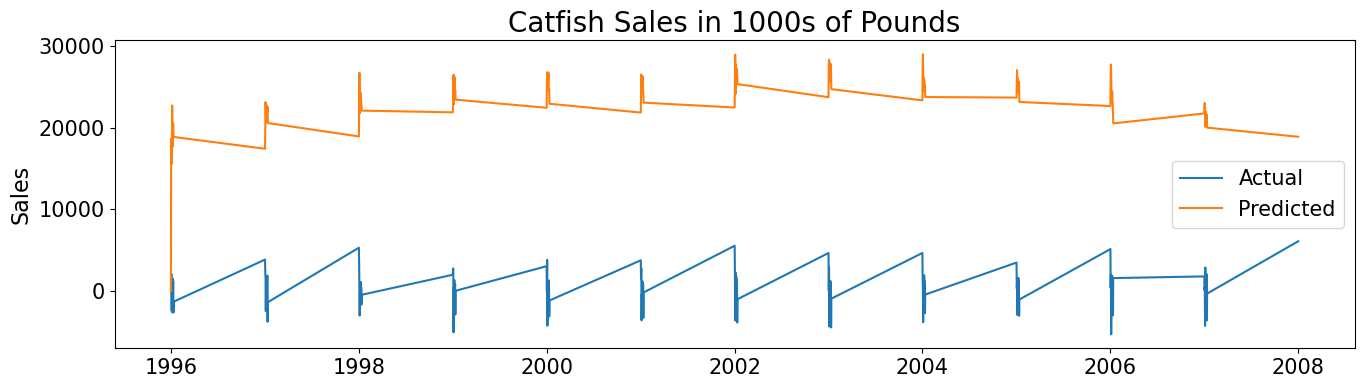

In [59]:
plt.figure(figsize=(16,4))
plt.plot(lim_catfish_sales.diff(), label="Actual")
plt.plot(predictions, label="Predicted")
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.legend()

# SARIMA

In [60]:
sarima = SARIMAX(lim_catfish_sales['Total'],
                order=(4,1,1),
                seasonal_order=(1,1,0,12))
predictions = sarima.fit().predict()

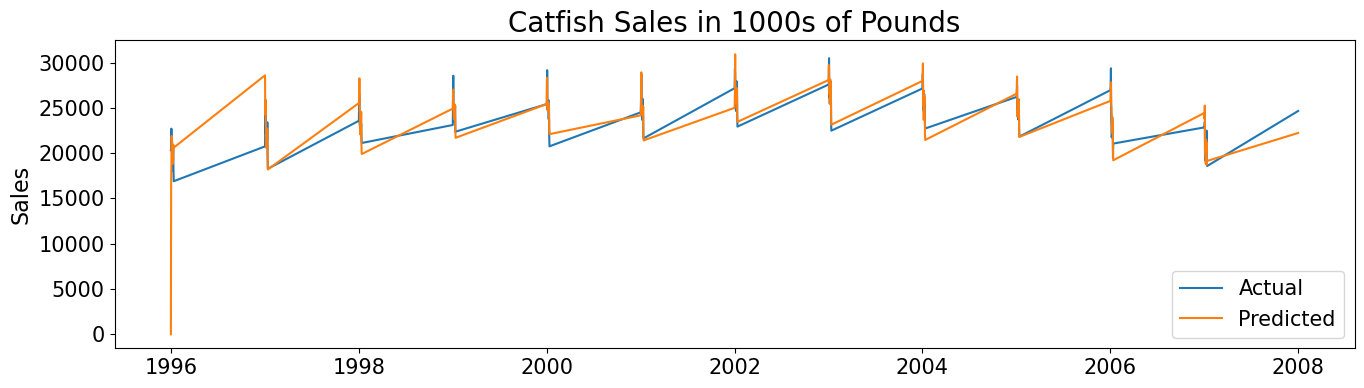

In [61]:
plt.figure(figsize=(16,4))
plt.plot(lim_catfish_sales, label="Actual")
plt.plot(predictions, label="Predicted")
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.legend()